We first need to import all of the necessary libraries in order to be able to perform our work and do our ERDs.

In [1]:
import sqlite3 #importing SQL
import pandas as pd #importing Pandas
import numpy as np #importing numpy
from scipy import stats #importing Scipy
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt #importing matplotlib
from pandasql import sqldf #to querry databases directly with SQL syntax
%matplotlib inline

Next we import and view our data

In [2]:
gross_df= pd.read_csv("data/bom.movie_gross.csv.gz") #importing bom.movie_gross.csv.gz

In [3]:

gross_df #viewing our csv file 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


We repeat this Process for both our CSV and TSV files

In [4]:
budgets_df= pd.read_csv("data/tn.movie_budgets.csv.gz")

In [5]:
budgets_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [6]:
movies_df= pd.read_csv("data/tmdb.movies.csv.gz")

In [7]:
movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [8]:
df_info = pd.read_csv("data/rt.movie_info.tsv.gz", sep='\t')

In [9]:
df_info

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [10]:
df_reviews = pd.read_csv("data/rt.reviews.tsv.gz", sep='\t', engine = 'python')

In [11]:
df_reviews

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


The next step is to connect and load our database

In [12]:
conn = sqlite3.connect('data/im.db')  #connecting our database

In [13]:
df = pd.read_sql("""SELECT * FROM sqlite_master;""", conn) #loading the master 
df.head() # viewing the master 

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."


In [14]:
basics_df = pd.read_sql("""SELECT DISTINCT * FROM movie_basics;""", conn)
basics_df.info() #loads basics table into dataframe and displays info
basics_df.head() # displays top 5 values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [15]:
ratings_df = pd.read_sql("""SELECT * FROM movie_ratings;""", conn) #loads rating table in a dataframe  
ratings_df.head() #displays rating table 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


We then need to join the necessary tables in our case it would be our KPI which is on the rating table and what we are evaluating the genre. We also noticed that before joining the tables the ratings table that the basics tables had more rows and that rating had significantly less row, however, there were no null values in ratings so when joining them we are going to assume that in the basics table had movies with no ratings.

In [17]:
joined_tables_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE averagerating >= 8 --we are making any movie above 8 a good movie 
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn) # we joined the tables basics and rating and looked at selected the the rows with an averagerating value of 8 and above

In [18]:
joined_tables_df.head(25) #viewed the top 25 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,"Documentary,War",9.7,6
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,"Documentary,Family,Romance",9.7,25
2,tt10146728,Foosballers,Foosballers,2019,NaN,"Comedy,Documentary,Sport",9.7,22
3,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History",9.5,6509
4,tt1791606,Some Called Them Baby Killers... We Call Them ...,Some Called Them Baby Killers... We Call Them ...,2010,93.0,"Documentary,Drama,War",9.4,5
5,tt4460258,Of Dogs and Men,Of Dogs and Men,2016,89.0,"Crime,Documentary,News",9.4,12
6,tt4135932,Lost Conquest,Lost Conquest,2015,70.0,"Comedy,Documentary,Fantasy",9.4,5
7,tt5858514,The Children of Genghis,Chingisiin huuhduud,2017,101.0,"Adventure,Family",9.4,797
8,tt8593814,The Boys Are Back - Bandstand: The Broadway Mu...,The Boys Are Back - Bandstand: The Broadway Mu...,2018,130.0,Musical,9.3,50
9,tt3856476,Sunakali,Sunakali,2017,59.0,"Documentary,Family,Musical",9.3,19


We noticed that there were a multituded of genres due to the way the string values were attached and that we would not be able to perform operation on those values without first seperating them.

In [19]:
joined_tables_df['genres'] = joined_tables_df['genres'].str.split(",") # split the genres and added a space in order to use the ex

In [20]:
genres_split_df=joined_tables_df.explode('genres') # used explode fucntion to seperate movies based on genres

We now have a new dataframe with each individual genre



In [21]:

genres_split_df # the seperation was loaded into this dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,Documentary,9.7,6
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,War,9.7,6
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Documentary,9.7,25
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Family,9.7,25
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Romance,9.7,25
...,...,...,...,...,...,...,...,...
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,Adventure,8.0,12
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,Crime,8.0,12
459,tt1663202,The Revenant,The Revenant,2015,156.0,Action,8.0,621193
459,tt1663202,The Revenant,The Revenant,2015,156.0,Adventure,8.0,621193


In [22]:
genres_split_df['genres'].value_counts() # the value counts shows us the genre categories and the the counts

Drama          147
Documentary    123
Comedy         116
Adventure       72
Action          71
Mystery         59
Thriller        58
Romance         54
Fantasy         53
Family          52
History         50
Crime           50
Biography       49
Animation       39
Sci-Fi          38
Music           36
Musical         34
Sport           30
Horror          28
War             27
News            17
Western         15
Reality-TV       3
Game-Show        1
Short            1
Name: genres, dtype: int64

In [23]:
genre_keys=genres_split_df['genres'].value_counts().keys() #this loads the keys of the series into a valuable 

In [24]:

genre_values=genres_split_df['genres'].value_counts().values #this loads the values into a variable

In [25]:
genre_values

array([147, 123, 116,  72,  71,  59,  58,  54,  53,  52,  50,  50,  49,
        39,  38,  36,  34,  30,  28,  27,  17,  15,   3,   1,   1],
      dtype=int64)

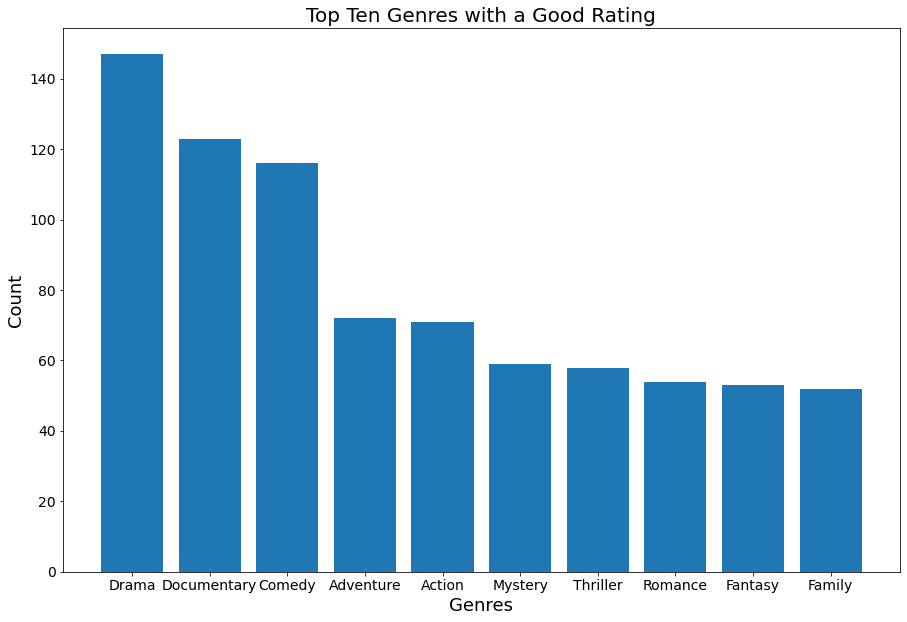

In [26]:
fig, ax = plt.subplots(figsize= (15,10) )
ax.bar(genre_keys[:10],genre_values[:10]) #the [:10] is to see the top ten genres in the dataset 
ax.set_title('Top Ten Genres with a Good Rating', fontsize= 20)
ax.set_xlabel('Genres',fontsize= 18)
ax.set_ylabel('Count',fontsize= 18)
ax.tick_params(axis='x', which='both', labelsize=14)
ax.tick_params(axis='y', which='both', labelsize=14)

#plots the top ten genres with a a rating above it based on the number of movies

Text(0.5, 1.0, 'Percentages by Genre')

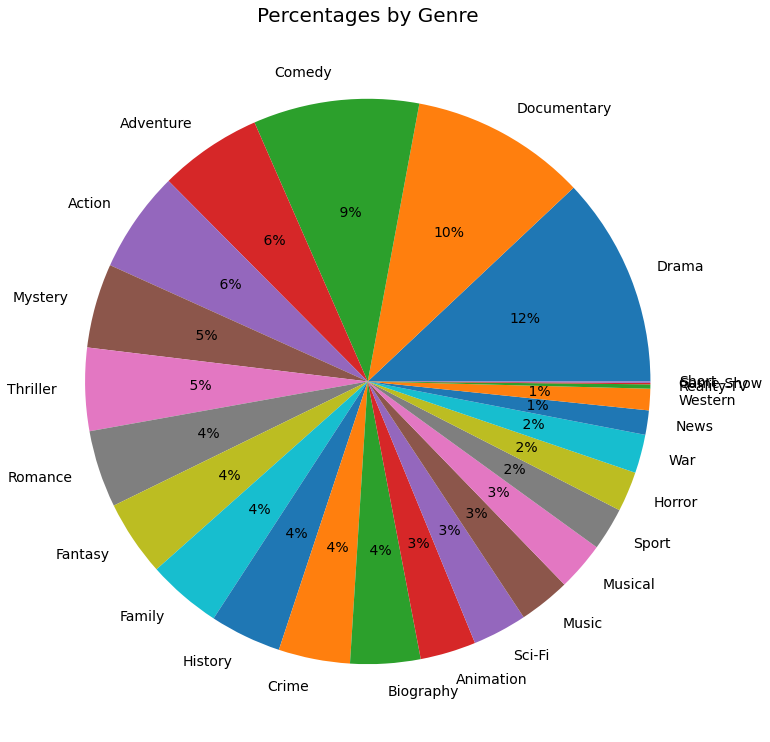

In [27]:
fig, ax = plt.subplots(figsize= (13,13) )
ax.pie(genre_values, labels=genre_keys,autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',textprops={'fontsize': 14}) #creates pie chart with the different genres
ax.tick_params(axis='x', which='both', labelsize=25)
ax.set_title('Percentages by Genre', fontsize= 20)
#plots a graph based on the percentage of movies produced by genre

According to our research we noticed that Drama, Documentary, and Comedies have by our standard the most good movies or movies we would recommend. We have to however account for the fact that there could have been more movies of those particular genres produced. Therefore we need to dig further.

We repeat the joining process agin but this time we are looking at all movies not just those with a rating higher than 8

In [28]:
jt_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn)

In [29]:
jt_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,"Documentary,Family,Romance",9.7,25
1,tt10146728,Foosballers,Foosballers,2019,NaN,"Comedy,Documentary,Sport",9.7,22
2,tt4135932,Lost Conquest,Lost Conquest,2015,70.0,"Comedy,Documentary,Fantasy",9.4,5
3,tt3856476,Sunakali,Sunakali,2017,59.0,"Documentary,Family,Musical",9.3,19
4,tt5903964,The Long Count Teaser,The Long Count Teaser,2016,NaN,"History,Sport",9.2,5
...,...,...,...,...,...,...,...,...
919,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248
920,tt0937353,The Devil's Flower,Tsvetok dyavola,2010,90.0,"Mystery,Romance",1.7,201
921,tt5161302,Eyal Hirrifah,Eyal Hirrifah,2015,101.0,"Comedy,Musical,Sport",1.4,28
922,tt1865374,Futures Past,Futures Past,2012,120.0,"Action,Biography,History",1.3,33


In [30]:
jt_df['averagerating'].corr(jt_df['numvotes']) #to make sure there is no correlation between the number of votes and the rating shows a very weak correlation

0.10485504654737278

In [31]:
jt_df['genres'] = jt_df['genres'].str.split(",")  #split the genres to use explode function 

In [32]:
jt_df=jt_df.explode('genres') #seperated genres into different rows

In [33]:
jt_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Documentary,9.7,25
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Family,9.7,25
0,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Romance,9.7,25
1,tt10146728,Foosballers,Foosballers,2019,NaN,Comedy,9.7,22
1,tt10146728,Foosballers,Foosballers,2019,NaN,Documentary,9.7,22
...,...,...,...,...,...,...,...,...
922,tt1865374,Futures Past,Futures Past,2012,120.0,Biography,1.3,33
922,tt1865374,Futures Past,Futures Past,2012,120.0,History,1.3,33
923,tt3437164,Maldito Amor,Maldito Amor,2014,100.0,Comedy,1.1,168
923,tt3437164,Maldito Amor,Maldito Amor,2014,100.0,History,1.1,168


In [34]:
avg_rating_genres=jt_df.groupby('genres')['averagerating'].mean().round(2) #rounding to two decimal values

In [35]:
sorted_avg_genres=avg_rating_genres.sort_values(ascending=False) #this sorts the values by highest rating


In [36]:
sorted_avg_genres

genres
Short          8.80
Documentary    7.38
Game-Show      7.30
News           6.86
Biography      6.67
Music          6.64
War            6.55
History        6.46
Reality-TV     6.46
Animation      6.36
Sport          6.36
Drama          6.33
Musical        6.32
Adventure      6.29
Comedy         6.21
Fantasy        6.21
Mystery        6.18
Thriller       6.12
Family         6.12
Western        6.08
Romance        6.08
Crime          6.07
Sci-Fi         5.89
Action         5.88
Horror         5.36
Adult          2.70
Name: averagerating, dtype: float64

In [37]:
value_counts_for_genres=jt_df['genres'].value_counts() # looking at the insights for the genres

In [38]:

value_counts_for_genres

Drama          215
Comedy         185
Documentary    173
Action         153
Adventure      140
Thriller       127
Horror         125
Romance        122
Family         121
Fantasy        117
Crime          116
Animation      113
History        113
Mystery        109
Sci-Fi         106
Biography       95
Music           88
Musical         79
Western         65
War             64
Sport           61
News            34
Reality-TV      10
Adult            2
Game-Show        2
Short            1
Name: genres, dtype: int64

In our analysis we noticed that even though some genres were highly rated there were not enough of them to have a definitive decision as they could have been outliers therefore we are droping genres with less than 50 samples.

In [39]:
cleaned_genres=value_counts_for_genres.where(lambda x: x >=50).dropna() #dropped values lower than 50

In [40]:
cleaned_genres #have the genres with more than 50 samples

Drama          215.0
Comedy         185.0
Documentary    173.0
Action         153.0
Adventure      140.0
Thriller       127.0
Horror         125.0
Romance        122.0
Family         121.0
Fantasy        117.0
Crime          116.0
Animation      113.0
History        113.0
Mystery        109.0
Sci-Fi         106.0
Biography       95.0
Music           88.0
Musical         79.0
Western         65.0
War             64.0
Sport           61.0
Name: genres, dtype: float64

In [41]:
a=sorted_avg_genres.drop('Short')
b= a.drop('Adult')
c= b.drop('Reality-TV')
d=c.drop('Game-Show')
cleaned=d.drop('News') #droping the values form the average genre

In [42]:
cleaned

genres
Documentary    7.38
Biography      6.67
Music          6.64
War            6.55
History        6.46
Animation      6.36
Sport          6.36
Drama          6.33
Musical        6.32
Adventure      6.29
Comedy         6.21
Fantasy        6.21
Mystery        6.18
Thriller       6.12
Family         6.12
Western        6.08
Romance        6.08
Crime          6.07
Sci-Fi         5.89
Action         5.88
Horror         5.36
Name: averagerating, dtype: float64

In [43]:
avg_keys=cleaned.keys()
avg_keys
avg_values=cleaned.values
avg_values

array([7.38, 6.67, 6.64, 6.55, 6.46, 6.36, 6.36, 6.33, 6.32, 6.29, 6.21,
       6.21, 6.18, 6.12, 6.12, 6.08, 6.08, 6.07, 5.89, 5.88, 5.36])

In [44]:
y = avg_values[:10]

C:\Users\rompalme\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-45-51c3c2d929bf>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))


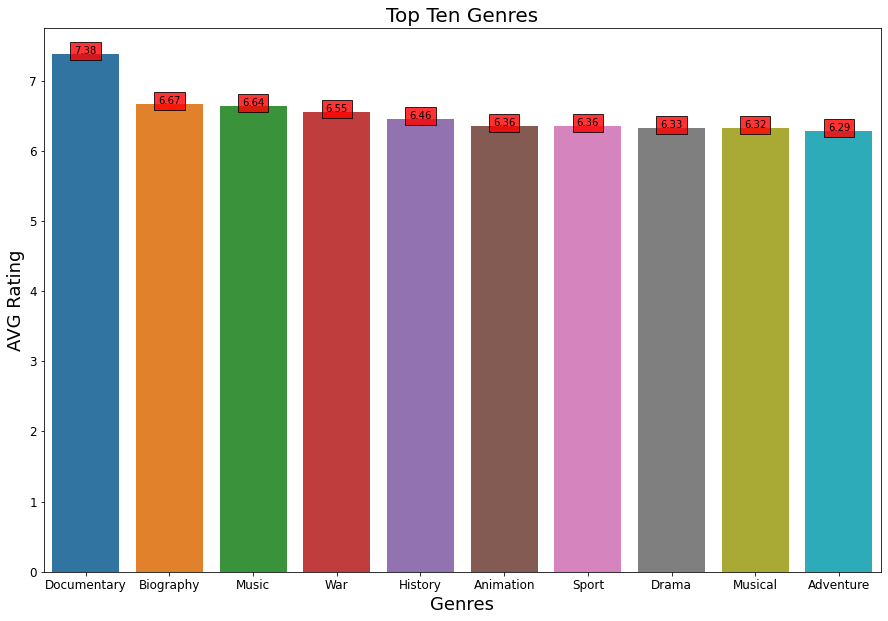

In [45]:
fig, ax = plt.subplots(figsize= (15,10) )
sns.barplot(avg_keys[:10],avg_values[:10]) #the [:10] is to see the top ten genres in the dataset 
ax.set_title('Top Ten Genres', fontsize= 20)
ax.set_xlabel('Genres',fontsize= 18)
ax.set_ylabel('AVG Rating',fontsize= 18)
ax.tick_params(axis='x', which='both', labelsize=12)
ax.tick_params(axis='y', which='both', labelsize=12)

for i in range(len(avg_keys[:10])):
        plt.text(i, y[i], y[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))

Once we plot our data we notice that documentaries has the highest average rating among all the genres and it also had the second genre with the most movies we'd recommend.

# Hypothesis Testing

Does the Documentary genre represent the entire population of genres?

In [46]:
# Ha : the Documentary genre has higher average ratings than the rest of the population
# Ho : the Documentary genre has the same or less average ratings compared to the rest of the population 

Our alpha will be alpha: .05 with a 95% confidence level

# Z test

In [47]:
jt_df['averagerating']

0      9.7
0      9.7
0      9.7
1      9.7
1      9.7
      ... 
922    1.3
922    1.3
923    1.1
923    1.1
923    1.1
Name: averagerating, Length: 2537, dtype: float64

In [48]:
mu=jt_df['averagerating'].mean() #average mean of the overall population 
mu

6.27761135199054

In [49]:
sigma=jt_df['averagerating'].std() #the standard deviation of the population 
sigma

1.4546765015932186

In [50]:
x_bar= sorted_avg_genres[1] #our sample mean 
x_bar

7.38

In [51]:
value_counts_for_genres

Drama          215
Comedy         185
Documentary    173
Action         153
Adventure      140
Thriller       127
Horror         125
Romance        122
Family         121
Fantasy        117
Crime          116
Animation      113
History        113
Mystery        109
Sci-Fi         106
Biography       95
Music           88
Musical         79
Western         65
War             64
Sport           61
News            34
Reality-TV      10
Adult            2
Game-Show        2
Short            1
Name: genres, dtype: int64

In [52]:
n=value_counts_for_genres[2] #our sample size 
n

173

We have the mean of our population and its standard deviation as well as the mean on our sample and a the sample size we can now perform a Z test to see the correlation between the documentaries genre and the entire population.

In [53]:
z_value=(x_bar-mu)/(sigma/np.sqrt(n))
z_value

9.967617422299378

In [54]:
print(stats.norm.sf(z_value))

1.0561760907123633e-23


# Recommendation

Because our p value is less than our alpha we reject our null hypothesis proving that the documentaries genre on average has higher ratings and would recomend that the Studio creates movies of said genre.

# Runtime

We are now going to look at movie runtime and if the length of the movie plays a part in its overall rating. 

In [55]:
joined_tables_runtime_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY averagerating
ORDER BY runtime_minutes DESC
;
""", conn)

In [56]:
joined_tables_runtime_df


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
1,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
3,tt0464162,Komaram Puli,Komaram Puli,2010,163.0,"Action,Crime,Thriller",3.8,1423
4,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
...,...,...,...,...,...,...,...,...
86,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
87,tt0977643,Chooriyan,Chooriyan,2015,NaN,"Drama,Musical,Romance",4.4,7
88,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
89,tt1555187,Campamento Flipy,Campamento Flipy,2010,NaN,Comedy,2.0,164


We first seperate the movies into highly rated movies vs poorly rated movies. 

In [57]:
# Filter out movies with a specific condition, e.g., only movies with ratings >= 8
highly_rated_movies = joined_tables_runtime_df[joined_tables_runtime_df['averagerating'] >= 8]
highly_rated_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
6,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,9.9,417
10,tt0464032,"Guns, Drugs and Dirty Money","Guns, Drugs and Dirty Money",2010,123.0,"Action,Comedy,Crime",8.0,39
11,tt0436782,A Life in the Death of Joe Meek,A Life in the Death of Joe Meek,2013,122.0,Documentary,9.1,24
14,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,8.8,8
16,tt10080924,Sweater,Sweater,2019,118.0,Drama,9.2,79
24,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
25,tt10121022,Freie Räume,Freie Räume,2019,102.0,Documentary,9.7,7
47,tt0825334,Caravaggio and My Mother the Pope,Caravaggio and My Mother the Pope,2018,90.0,"Comedy,Drama",8.9,51
61,tt0430524,The Rescuer,The Rescuer,2011,84.0,Documentary,8.7,14


In [58]:
poorly_rated_movies = joined_tables_runtime_df[joined_tables_runtime_df['averagerating'] <= 3]
poorly_rated_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
13,tt1611056,Hito no sabaku,Hito no sabaku,2010,121.0,Drama,1.0,449
15,tt1865374,Futures Past,Futures Past,2012,120.0,"Action,Biography,History",1.3,33
22,tt1316037,Birdemic: Shock and Terror,Birdemic: Shock and Terror,2010,105.0,"Action,Comedy,Drama",1.8,19137
28,tt10214842,Milliard,Milliard,2019,101.0,"Comedy,Crime,Thriller",2.6,189
33,tt0875613,Rift,Rift,2011,100.0,"Horror,Thriller",2.7,404
34,tt0484828,La daga de Rasputín,La daga de Rasputín,2011,99.0,"Adventure,Comedy",3.0,186
35,tt0996958,Legend of the Red Reaper,Legend of the Red Reaper,2013,99.0,"Action,Adventure,Fantasy",2.2,495
43,tt0887143,Hyenas,Hyenas,2011,92.0,Horror,2.8,952
44,tt1624391,Killer Bitch,Killer Bitch,2010,92.0,Thriller,1.5,437
46,tt0249516,Foodfight!,Foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248


We then categorize movies on whether they are short or long based on their runtime

In [59]:
# Filter out movies with a certain runtime
long_movies = joined_tables_runtime_df[joined_tables_runtime_df['runtime_minutes'] > 120]
long_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
1,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
3,tt0464162,Komaram Puli,Komaram Puli,2010,163.0,"Action,Crime,Thriller",3.8,1423
4,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584
5,tt0403935,Action Jackson,Action Jackson,2014,144.0,"Action,Thriller",3.3,2862
6,tt9537008,Gini Helida Kathe,Gini Helida Kathe,2019,138.0,Drama,9.9,417
7,tt0364201,Aman Ke Farishtey,Aman Ke Farishtey,2016,137.0,Action,6.4,16
8,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
9,tt0253093,Gangavataran,Gangavataran,2018,134.0,None,6.6,8


In [60]:
short_movies = joined_tables_runtime_df[joined_tables_runtime_df['runtime_minutes'] < 120]
short_movies

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
16,tt10080924,Sweater,Sweater,2019,118.0,Drama,9.2,79
17,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300
18,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
19,tt0419692,Disconnect,Disconnect,2010,112.0,"Drama,Mystery,Sci-Fi",4.5,190
20,tt0330987,"Tiden är en dröm, del 2","Tiden är en dröm, del 2",2014,109.0,None,6.3,6
...,...,...,...,...,...,...,...,...
76,tt2498292,Under a Jarvis Moon,Under a Jarvis Moon,2010,56.0,Documentary,9.5,6
77,tt0460528,One Step Beyond: The True Story of Géraldine F...,One Step Beyond,2012,56.0,Documentary,8.5,26
78,tt10176328,Exteriores: Mulheres Brasileiras na Diplomacia,Exteriores: Mulheres Brasileiras na Diplomacia,2018,52.0,Documentary,10.0,5
79,tt10015432,Forest of the Dead Sharks,Forest of the Dead Sharks,2019,50.0,"Action,Comedy,Horror",8.4,23


In [61]:
correlation = joined_tables_runtime_df['runtime_minutes'].corr(joined_tables_runtime_df['averagerating'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.08901318429856621


In [62]:
# Custom bins for runtime ranges. shows the average rating of movies within each bin
bins = [0, 60, 90, 120, 150, float('inf')]  
labels = ['<60', '60-89', '90-119', '120-149', '150+']
joined_tables_runtime_df['runtime_bin'] = pd.cut(joined_tables_runtime_df['runtime_minutes'], bins=bins, labels=labels)
average_rating_by_runtime_bin = joined_tables_runtime_df.groupby('runtime_bin')['averagerating'].mean()

print(average_rating_by_runtime_bin)

runtime_bin
<60        8.166667
60-89      4.917857
90-119     4.990909
120-149    6.444444
150+       7.100000
Name: averagerating, dtype: float64


In [63]:
#this shows how many movies are in each 'bin' so we can see the more popular runtimes
joined_tables_runtime_df['runtime_bin'] = pd.cut(joined_tables_runtime_df['runtime_minutes'], bins=bins, labels=labels)
movie_count_by_runtime_bin = joined_tables_runtime_df['runtime_bin'].value_counts().sort_index()
movie_count_by_runtime_bin

<60         6
60-89      28
90-119     33
120-149     9
150+        5
Name: runtime_bin, dtype: int64

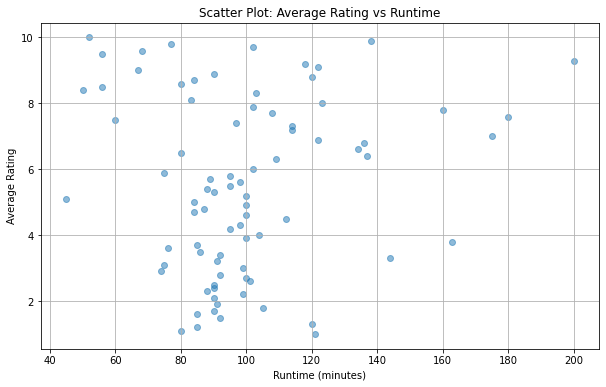

In [64]:
# Assuming 'conn' is your SQLite connection
joined_tables_runtime_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY averagerating 
ORDER BY runtime_minutes DESC
;
""", conn)

# Created a scatter plot comparing the average rating and the runtime in minutes
plt.figure(figsize=(10, 6))
plt.scatter(joined_tables_runtime_df['runtime_minutes'], joined_tables_runtime_df['averagerating'], alpha=0.5)
plt.title('Scatter Plot: Average Rating vs Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [65]:

# calculating the correlation between runtime and average rating
correlation = joined_tables_runtime_df['runtime_minutes'].corr(joined_tables_runtime_df['averagerating'])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.08901318429856621


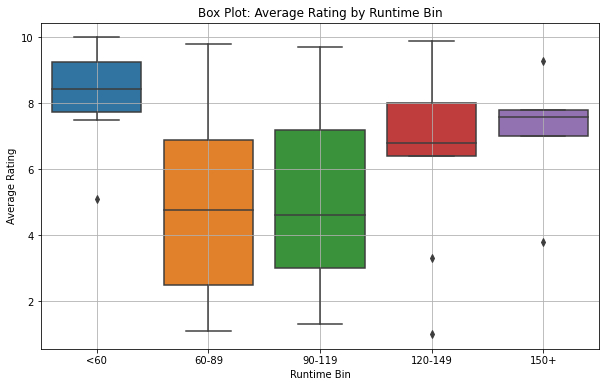

In [66]:
bins = [0, 60, 90, 120, 150, float('inf')]  
labels = ['<60', '60-89', '90-119', '120-149', '150+']
joined_tables_runtime_df['runtime_bin'] = pd.cut(joined_tables_runtime_df['runtime_minutes'], bins=bins, labels=labels)

 

# Created a box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=joined_tables_runtime_df, x='runtime_bin', y='averagerating')
plt.title('Box Plot: Average Rating by Runtime Bin')
plt.xlabel('Runtime Bin')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

We noticed that by their categories that either a movie of less than 60 minutes or one of greater than 120 minutes would beideal but the sample size for those movies were small and when the data was inputed into a scatter plot no real relationship was found that might stand true for all movies but how about for a specific genre. Due to us previously recommending the documentary genre lets see if a documentaries runtime would afect its rating. 

In [67]:
#joining the tables and specifying that average rating should be greater than or equal to 8
joined_tables_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
WHERE averagerating >= 8
GROUP BY genres
ORDER BY averagerating DESC
;
""", conn)

In [68]:
joined_tables_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,"Documentary,War",9.7,6
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,"Documentary,Family,Romance",9.7,25
2,tt10146728,Foosballers,Foosballers,2019,NaN,"Comedy,Documentary,Sport",9.7,22
3,tt5963218,Aloko Udapadi,Aloko Udapadi,2017,113.0,"Drama,History",9.5,6509
4,tt1791606,Some Called Them Baby Killers... We Call Them ...,Some Called Them Baby Killers... We Call Them ...,2010,93.0,"Documentary,Drama,War",9.4,5
...,...,...,...,...,...,...,...,...
455,tt8202076,Super Hero,Super Hero,2018,NaN,"Action,Adventure,Thriller",8.0,276
456,tt1821682,Traffic,Traffic,2011,122.0,"Action,Adventure,Mystery",8.0,3551
457,tt2488496,Star Wars: Episode VII - The Force Awakens,Star Wars: Episode VII - The Force Awakens,2015,136.0,"Action,Adventure,Fantasy",8.0,784780
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,"Action,Adventure,Crime",8.0,12


In [69]:
joined_tables_df['genres'] = joined_tables_df['genres'].str.split(",") 

In [70]:
# used explode fucntion to seperate movies based on genres

In [71]:
genres_split_df # the seperation was loaded into this dataframe

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,Documentary,9.7,6
0,tt7541970,From Shock to Awe,From Shock to Awe,2017,87.0,War,9.7,6
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Documentary,9.7,25
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Family,9.7,25
1,tt1740810,Love on a Leash,Love on a Leash,2010,10.0,Romance,9.7,25
...,...,...,...,...,...,...,...,...
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,Adventure,8.0,12
458,tt3796898,Mousetrap 2,Mousetrap 2,2014,80.0,Crime,8.0,12
459,tt1663202,The Revenant,The Revenant,2015,156.0,Action,8.0,621193
459,tt1663202,The Revenant,The Revenant,2015,156.0,Adventure,8.0,621193


In [72]:
genres_split_df['genres'].value_counts() # the value counts shows us the genre categories and the the counts

Drama          147
Documentary    123
Comedy         116
Adventure       72
Action          71
Mystery         59
Thriller        58
Romance         54
Fantasy         53
Family          52
History         50
Crime           50
Biography       49
Animation       39
Sci-Fi          38
Music           36
Musical         34
Sport           30
Horror          28
War             27
News            17
Western         15
Reality-TV       3
Game-Show        1
Short            1
Name: genres, dtype: int64

In [73]:
joined_tables_df = pd.read_sql("""
    SELECT mb.genres, mr.averagerating, mb.runtime_minutes
    FROM movie_basics mb
    JOIN movie_ratings mr USING(movie_id)
    WHERE mr.averagerating >= 8
    AND runtime_minutes IS NOT null
    AND mb.genres = 'Documentary'
""", conn)

# Display the resulting DataFrame
joined_tables_df

,genres,averagerating,runtime_minutes
0,Documentary,8.7,84.0
1,Documentary,9.1,122.0
2,Documentary,8.5,56.0
3,Documentary,8.5,60.0
4,Documentary,8.3,82.0
...,...,...,...
2380,Documentary,8.1,96.0
2381,Documentary,8.2,100.0
2382,Documentary,8.7,125.0
2383,Documentary,9.3,90.0


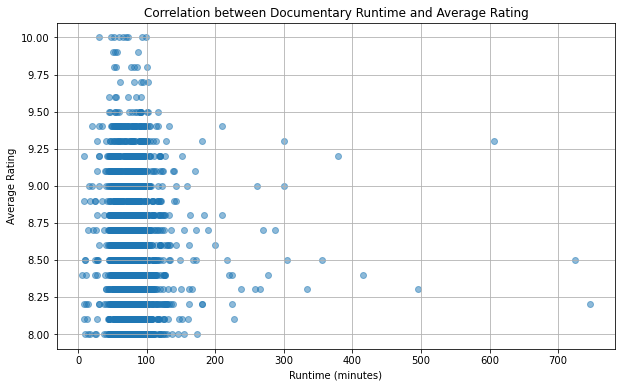

In [74]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(joined_tables_df['runtime_minutes'], joined_tables_df['averagerating'], alpha=0.5)
plt.title('Correlation between Documentary Runtime and Average Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()

In [75]:
correlation_coefficient = joined_tables_df['runtime_minutes'].corr(joined_tables_df['averagerating'])
correlation_coefficient

-0.04176340945531294

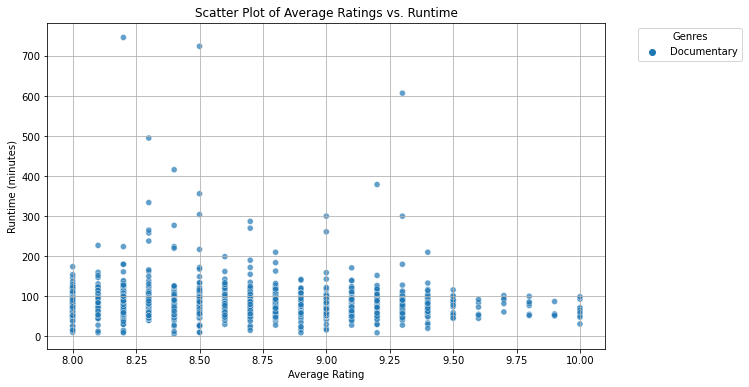

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=joined_tables_df, x='averagerating', y='runtime_minutes', hue='genres', alpha=0.7)
plt.title('Scatter Plot of Average Ratings vs. Runtime')
plt.xlabel('Average Rating')
plt.ylabel('Runtime (minutes)')
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Recommendation 
 We recommend the studio not invest additional resources into considering film length when developing movies, as we have not found any measurable correlation between how well a movie is rated and it’s length.

# Directors

We are joining three tables ( persons, directors,movie ratings) Using movie_id to join directors and movie ratings and person_id to combine that new table to the persons table.

In [77]:
q = """
SELECT *
FROM movie_ratings
JOIN directors
    USING(movie_id)
JOIN Persons
    ON persons.person_id = directors.person_id
;
"""
pd.read_sql(q, conn)
df_directors = pd.read_sql(q, conn)
df_directors

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
1,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9250842,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,nm9932562,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...
181382,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181383,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,nm1272773,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,nm0001206,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


# Data Cleaning
For this section it seems we have lots of duplicates and would require some data cleaning.

In [78]:
df_duplicates = df_directors.drop_duplicates() #dropping the duplicates
df_duplicates

,movie_id,averagerating,numvotes,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt10356526,8.3,31,nm8353804,nm8353804,Sukh Sanghera,NaN,NaN,"director,cinematographer,location_management"
2,tt10384606,8.9,559,nm9250842,nm9250842,Caolan Robertson,NaN,NaN,"producer,director,writer"
3,tt10384606,8.9,559,nm9932562,nm9932562,George Llewelyn-John,NaN,NaN,"director,cinematographer,writer"
4,tt1042974,6.4,20,nm1915232,nm1915232,Marcel Grant,NaN,NaN,"director,writer,producer"
5,tt1043726,4.2,50352,nm0001317,nm0001317,Renny Harlin,1959.0,NaN,"producer,director,writer"
...,...,...,...,...,...,...,...,...,...
181381,tt9805820,8.1,25,nm3828616,nm3828616,Alexandru Mavrodineanu,NaN,NaN,"director,writer,cinematographer"
181382,tt9844256,7.5,24,nm0849465,nm0849465,Gorô Taniguchi,NaN,NaN,"director,art_department,writer"
181384,tt9851050,4.7,14,nm1272773,nm1272773,Prachya Pinkaew,1962.0,NaN,"producer,director,writer"
181385,tt9886934,7.0,5,nm0001206,nm0001206,Abel Ferrara,1951.0,NaN,"director,writer,soundtrack"


In [79]:
df_duplicates.drop(columns=['death_year','birth_year', 'person_id', 'primary_profession'],inplace=True)

C:\Users\rompalme\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
df_duplicates

,movie_id,averagerating,numvotes,primary_name
0,tt10356526,8.3,31,Sukh Sanghera
2,tt10384606,8.9,559,Caolan Robertson
3,tt10384606,8.9,559,George Llewelyn-John
4,tt1042974,6.4,20,Marcel Grant
5,tt1043726,4.2,50352,Renny Harlin
...,...,...,...,...
181381,tt9805820,8.1,25,Alexandru Mavrodineanu
181382,tt9844256,7.5,24,Gorô Taniguchi
181384,tt9851050,4.7,14,Prachya Pinkaew
181385,tt9886934,7.0,5,Abel Ferrara


In [81]:
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86030 entries, 0 to 181386
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       86030 non-null  object 
 1   averagerating  86030 non-null  float64
 2   numvotes       86030 non-null  int64  
 3   primary_name   86030 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.3+ MB


In [82]:
df.isna().sum()

type        0
name        0
tbl_name    0
rootpage    0
sql         0
dtype: int64

In [83]:
df = df_duplicates.dropna() #droppping the null values
df_duplicates.isna().sum()

movie_id         0
averagerating    0
numvotes         0
primary_name     0
dtype: int64

In [84]:
df_duplicates

,movie_id,averagerating,numvotes,primary_name
0,tt10356526,8.3,31,Sukh Sanghera
2,tt10384606,8.9,559,Caolan Robertson
3,tt10384606,8.9,559,George Llewelyn-John
4,tt1042974,6.4,20,Marcel Grant
5,tt1043726,4.2,50352,Renny Harlin
...,...,...,...,...
181381,tt9805820,8.1,25,Alexandru Mavrodineanu
181382,tt9844256,7.5,24,Gorô Taniguchi
181384,tt9851050,4.7,14,Prachya Pinkaew
181385,tt9886934,7.0,5,Abel Ferrara


In [85]:
df_duplicates.value_counts("primary_name").head(10)

primary_name
Sergey A.              39
Nayato Fio Nuala       37
Larry Rosen            34
Dustin Ferguson        31
Jason Impey            30
Paul T.T. Easter       28
Michael Fredianelli    28
Tony Newton            27
David DeCoteau         27
William Winckler       25
dtype: int64

Listed out all the movies directed by Sergey A. with associated rating

In [86]:
selected_rows = df_duplicates.query("primary_name == 'Sergey A.'")

selected_rows

,movie_id,averagerating,numvotes,primary_name
10539,tt8220556,8.0,28,Sergey A.
19415,tt6067750,7.0,55,Sergey A.
21237,tt4654864,7.1,29,Sergey A.
22713,tt4654818,7.5,33,Sergey A.
44205,tt5970646,7.3,37,Sergey A.
44565,tt6737634,6.7,37,Sergey A.
46850,tt7579702,6.7,31,Sergey A.
50606,tt7640228,5.8,48,Sergey A.
53202,tt4168808,7.1,138,Sergey A.
56963,tt6498526,7.2,42,Sergey A.


Calculate the mean rating for Sergey A.

In [87]:
averagerating_values =  selected_rows['averagerating']
mean_aveeragerating_sergey = sum(averagerating_values) / len(averagerating_values)
print(mean_aveeragerating_sergey )

7.441025641025644


Calculated the average rating for the top 10 directors based on the number of movies they directed

In [88]:
# Step 1
grouped_data = df_duplicates.groupby('primary_name').agg({'averagerating': 'mean', 'movie_id': 'size'})

 

# Step 2
grouped_data.rename(columns={'averagerating': 'mean_averagerating', 'movie_id': 'movie_count'}, inplace=True)

 

# Step 3
top_10_names = grouped_data.sort_values(by='movie_count', ascending=False).head(10)

 

# Step 4
mean_averagerating_top_10 = top_10_names['mean_averagerating'].mean()

 

# Print the top 10 names, their mean averagerating, and the mean of averagerating for the top 10 names
#print(top_10_names)
print("\nMean Averagerating for Top 10 Names:", mean_averagerating_top_10)

df2= top_10_names.sort_values('mean_averagerating',ascending=False)
print(df2.head(10))


Mean Averagerating for Top 10 Names: 5.417335630864094
                     mean_averagerating  movie_count
primary_name                                        
Sergey A.                      7.441026           39
Larry Rosen                    7.405882           34
William Winckler               6.980000           25
Michael Fredianelli            6.182143           28
Jason Impey                    5.543333           30
Tony Newton                    5.218519           27
Nayato Fio Nuala               4.713514           37
Dustin Ferguson                4.003226           31
David DeCoteau                 3.400000           27
Paul T.T. Easter               3.285714           28


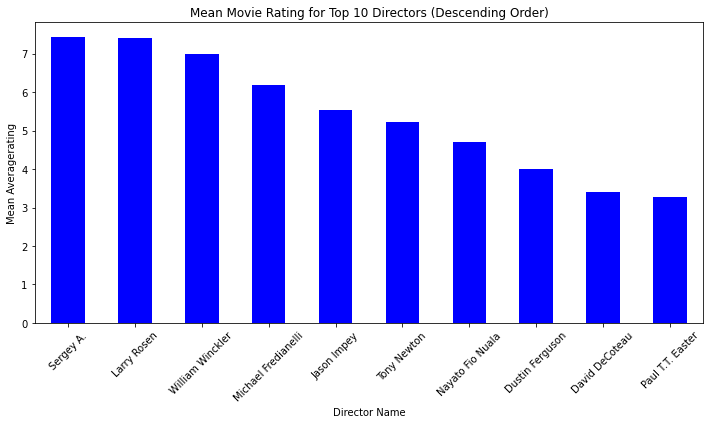

In [89]:
top_10_names_sorted = top_10_names.sort_values(by='mean_averagerating', ascending=False)

 

plt.figure(figsize=(10, 6))
top_10_names_sorted['mean_averagerating'].plot(kind='bar', color='blue')
plt.xlabel('Director Name')
plt.ylabel('Mean Averagerating')
plt.title('Mean Movie Rating for Top 10 Directors (Descending Order)')
plt.xticks(rotation=45)
plt.tight_layout()

 

plt.show()

# Recommendation
These are the directors we recommend because they had the most experience with the highest ratings. Sergey A., Larry Rosen, and William Winckler.

# Summary
For our client we would recommend starting and investing heavily into the making Documentaries of any am ount of length as that metric does not seem to affect ratings with the recommended directors as some of them do have some experience in making Documentaries. 